# KNN with Python Scikit Learn

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement knn supervised learning. 


In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
score_data = pd.read_csv("http://bit.ly/w-data")
print("Data imported successfully")

score_data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Plotting data on 2-D

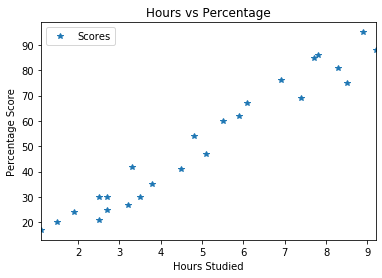

In [3]:
score_data.plot(x="Hours",y="Scores", style="*")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# checking data

In [4]:
score_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
score_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
score_data.isnull().sum() #no null value

Hours     0
Scores    0
dtype: int64

In [7]:
# to check the correlation
score_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X= score_data.iloc[:, :-1].values
y= score_data.iloc[:, 1].values


from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 2020)  

# Import KNeighbourClassifier 

In [9]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

clf = KNeighborsClassifier(n_neighbors= 5, metric = 'euclidean')

In [10]:
#fitting the model
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
pred= clf.predict(X_test)
print(pred)

[54 27 60 30 27 75 30 17]


In [12]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df 


,Actual,Predicted
0,67,54
1,47,27
2,76,60
3,42,30
4,41,27
5,95,75
6,30,30
7,24,17


# You can also test with your own 

In [19]:
# Getting error when finding for 9.25 hour
hours = 9.25
own_pred = clf.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0:]))

No of Hours = 9.25
Predicted Score = [75]
